In [1]:
import sys
sys.path.insert(0, '../')

import math
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from gasp import ssfp, phantom, tissue

In [2]:
# Experiment parameters
T1, T2 = 1.2, .035
TR, alpha = 5e-3, np.deg2rad(30)
TE = TR / 2.0
BetaMax = np.pi
beta = np.linspace(-BetaMax, BetaMax, 100)
f = beta / TR / (2 * np.pi)
npcs = 8
pcs = np.linspace(0, 2*np.pi, npcs, endpoint=False)

# Simulate acquisition of phase-cycles for a single voxel
M = ssfp.ssfp(T1, T2, TR, TE, alpha, pcs, f0=f)

In [3]:
M.shape

(100, 8)

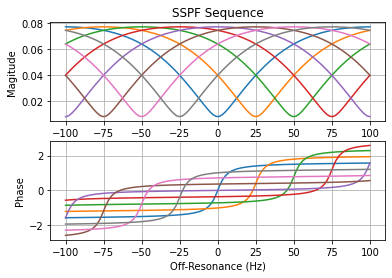

In [4]:
plt.subplot(211)
plt.plot(f, np.absolute(M))
plt.ylabel('Magitude')
plt.title('SSPF Sequence')
plt.grid(True)

plt.subplot(212)
plt.plot(f, np.angle(M))
plt.xlabel('Off-Resonance (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.show()

In [5]:
img = phantom.phantom_generator(type='circle')
t = tissue.tissue_generator(type='circle')
mask = t['mask']
size = mask.shape
t1 = t['t1']
t2 = t['t2']
BetaMax = 8 * np.pi
beta = np.linspace(-BetaMax, BetaMax, size[1])
f = beta / TR / (2 * np.pi)
f = np.tile(f, (size[0], 1))
M2 = ssfp.ssfp(t1, t2, TR, TE, alpha, field_map=f, M0 = mask)

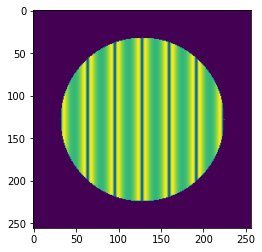

In [6]:
plt.imshow(abs(M2))
plt.show()

In [7]:
img = phantom.phantom_generator(type='circle')
t = tissue.tissue_generator(type='circle')
mask = t['mask']
t1 = t['t1']
t2 = t['t2']
BetaMax = 8 * np.pi
beta = np.linspace(-BetaMax, BetaMax, size[1])
f = beta / TR / (2 * np.pi)
f = np.tile(f, (size[0], 1))
pcs = np.linspace(0, 2 * math.pi, npcs, endpoint=False)
M = ssfp.ssfp(t1, t2, TR, TE, alpha, field_map=f, dphi=pcs, M0 = mask)

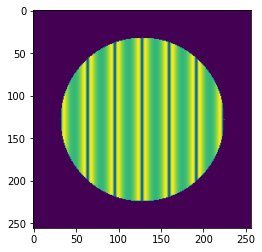

In [8]:
plt.imshow(abs(M[:,:,0]))
plt.show()

In [9]:
M = ssfp.add_noise(M, sigma=0.01)

In [10]:
M.shape

(256, 256, 8)

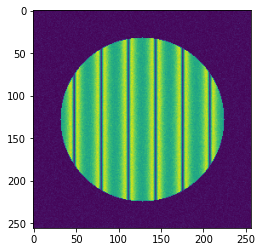

In [11]:
plt.imshow(abs(M[:,:,4]))
plt.show()

In [12]:
img = phantom.phantom_generator(type='blocks')
t = tissue.tissue_generator(type='blocks')
mask = t['mask']
t1 = t['t1']
t2 = t['t2']
BetaMax = 16 * np.pi
beta = np.linspace(-BetaMax, BetaMax, size[1])
f = beta / TR / (2 * np.pi)
f = np.tile(f, (size[0], 1))
M = ssfp.ssfp(t1, t2, TR, TE, alpha, field_map=f, M0 = mask)

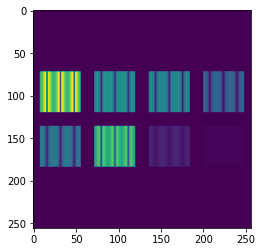

In [13]:
plt.imshow(abs(M))
plt.show()

In [14]:
# Alpha Experiment parameters
T1, T2 = 1.2, .035
TR, alpha = 5e-3, np.deg2rad(30)
TE = TR / 2.0
BetaMax = 2 * np.pi
beta = np.linspace(-BetaMax, BetaMax, 128)
f = beta / TR / (2 * np.pi)

# Simulate acquisition of phase-cycles for a single voxel
M = []
alphas = np.linspace(np.deg2rad(0), np.deg2rad(90), 90 + 1).tolist()
for alpha in alphas:
    M.append(ssfp.ssfp(T1, T2, TR, TE, alpha, f0=f))
M = np.stack(M)

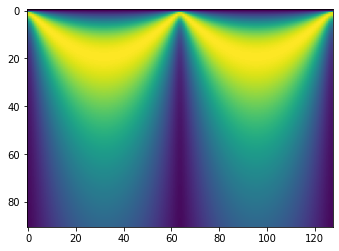

In [15]:
plt.imshow(abs(M))
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


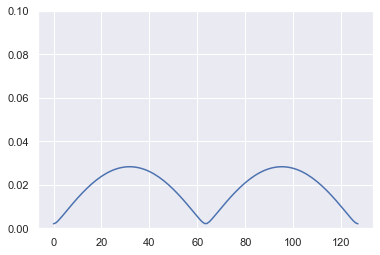

In [16]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

# set seaborn darkgrid theme
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots()

def animate(frame_num):
    ax.clear()
    ax.set_ylim(0, 0.1)
    ax.plot(abs(M[frame_num]))
    return ax

anim = FuncAnimation(fig, animate, frames=M.shape[0], interval=100)

anim.save('./images/bssfp.gif')

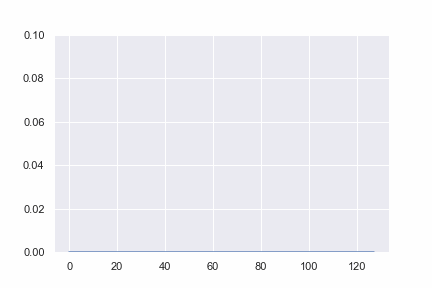

In [18]:
from IPython.display import Image
Image(open('./images/bssfp.gif','rb').read())

In [17]:
#Try GASP with low and hight alpha 